In [2]:

import pandas as pd
import numpy as np
from datetime import datetime
import random
import seaborn as sns


In [3]:
import pandas as pd
import random

# Datos base
sucursales = ['Sucursal Norte', 'Sucursal Centro', 'Sucursal Sur']

gaseosas = {
    'Coca Cola': (2000, 10000, 1.3, 1.1),  # precio base, unidades vendidas, variacion anual precio, variación anual unidades
    'Fanta':     (1800,  2000, 0.8, 0.8),
    'Sprite':    (1900,  8000, 1.1, 0.9),
    '7 Up':      (1500,  1000, 1.0, 1.5),
    'Pepsi':     (1700,  8000, 1.2, 1.0),
}

# Datos de vinos
vinos = {
    'Cabernet Sauvignon': (3000, 5000, 1.2, 1.1),
    'Merlot':             (2500, 4000, 1.1, 1.0),
    'Pinot Noir':         (3500, 3000, 1.3, 1.2),
    'Chardonnay':         (2800, 4500, 1.2, 1.1),
    'Sauvignon Blanc':    (2600, 3500, 1.1, 1.0),
}

productos = {
    'gaseosas': gaseosas,
    'vinos': vinos,
}

# productos = gaseosas
# Generar datos
for tipo, variantes in productos.items():
    datos = []
    for año in range(2020, 2024 + 1):
        for mes in range(1, 12 + 1):
            for sucursal in sucursales:
                for producto, (precio_base, unidades_base, var_precio, var_unidades) in variantes.items():
                    # Calcular unidades vendidas y precio con variación anual
                    unidades_anuales = unidades_base * (var_unidades ** (año - 2020))
                    precio_anual = precio_base * (var_precio ** (año - 2020))
                    
                    unidades = int(unidades_anuales * random.uniform(0.9, 1.1))
                    precio = precio_anual * random.uniform(0.9, 1.1)
                    
                    # Calcular ingresos y costos
                    ingreso = unidades * precio
                    costo = unidades * precio * random.uniform(0.6, 0.8)
                    
                    datos.append({
                        'Sucursal': sucursal,
                        'Producto': producto,
                        'Año': año,
                        'Mes': mes,
                        'Unidades_vendidas': unidades,
                        'Ingreso_total': round(ingreso, 2),
                        'Costo_total': round(costo, 2)
                    })

    # Crear DataFrame y guardar como CSV
    df = pd.DataFrame(datos)
    destino = f'{tipo}.csv'
    df.to_csv(destino, index=False)
    print(f"Se han generado {len(datos)} registros de ventas y guardado en '{destino}'")


Se han generado 900 registros de ventas y guardado en 'gaseosas.csv'
Se han generado 900 registros de ventas y guardado en 'vinos.csv'


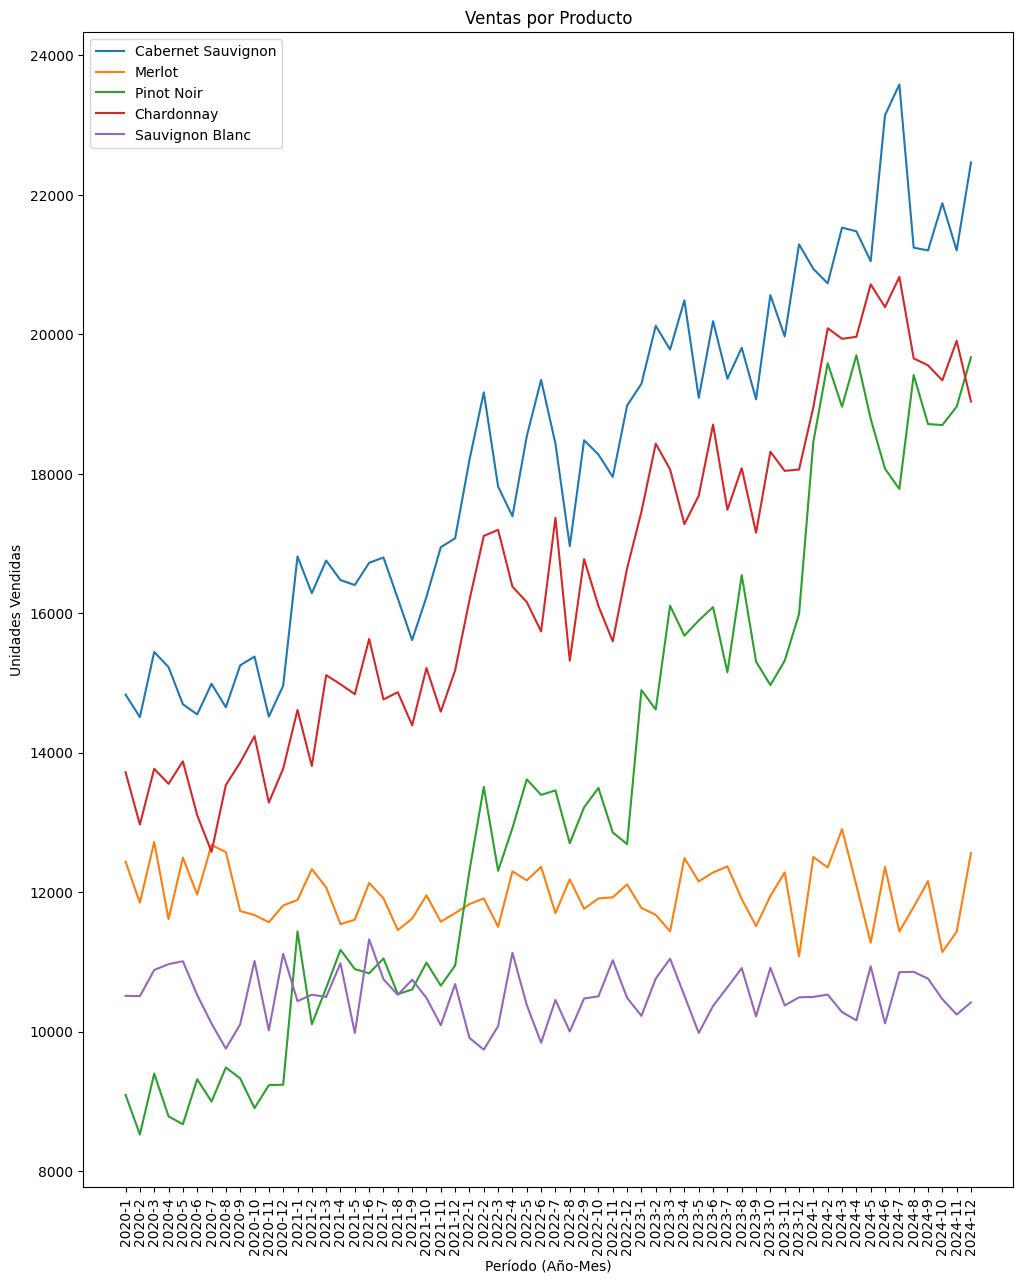

In [4]:
# Nueva celda para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo
# plt.style.use('seaborn')
fig, (ax1) = plt.subplots(1, 1, figsize=(12, 15))

# 1. Ventas por producto a lo largo del tiempo
ventas_producto = df.groupby(['Año', 'Mes', 'Producto'])['Unidades_vendidas'].sum().reset_index()
productos = df['Producto'].unique()

for producto in productos:
    data = ventas_producto[ventas_producto['Producto'] == producto]
    ax1.plot(data['Año'].astype(str) + '-' + data['Mes'].astype(str), data['Unidades_vendidas'], label=producto)

ax1.set_title('Ventas por Producto')
ax1.set_xlabel('Período (Año-Mes)')
ax1.set_ylabel('Unidades Vendidas')
# ax1.set_ylim([0, 10000])
ax1.legend()
plt.xticks(rotation=90)
plt.show()

